![world-cup-18](images/fifa-world-cup-2018.jpg)
https://github.com/khanhnamle1994/world-cup-2018

In [5]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
from chart_studio import plotly as py
import tensorflow as tf

/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood

## 1 - Data Preparation
### 1.1 Load Data

In [2]:
FIFA18 = pd.read_csv('./CompleteDataset.csv', low_memory=False)
FIFA18.columns

FIFA18.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


Let's select the most interesting columns from loaded dataset:

In [3]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)

### 1.2 Summarize Data

In [4]:
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [5]:
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Preferred Positions    17981 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


### 1.3 Preprocess Data
Right away I can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Thus I'll preprocess the data to make it usable. I will use short supporting function to convert values in those two columns into numbers. I will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [6]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

To make things simpler, I select the first position from list as preferred and save it in 'Position' column.

In [7]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

## 2 - Data Visualization
### 2.1 Age

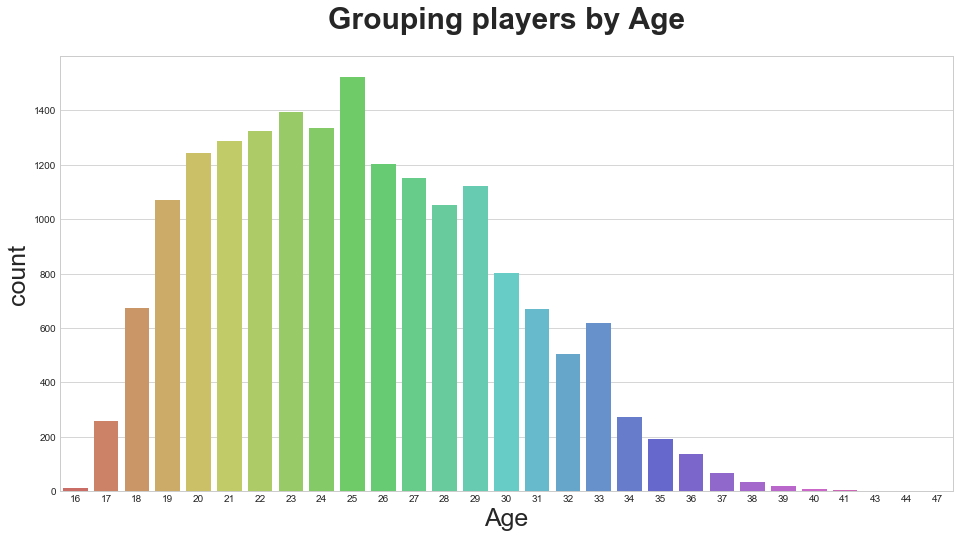

In [8]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()

### 2.2 Overall

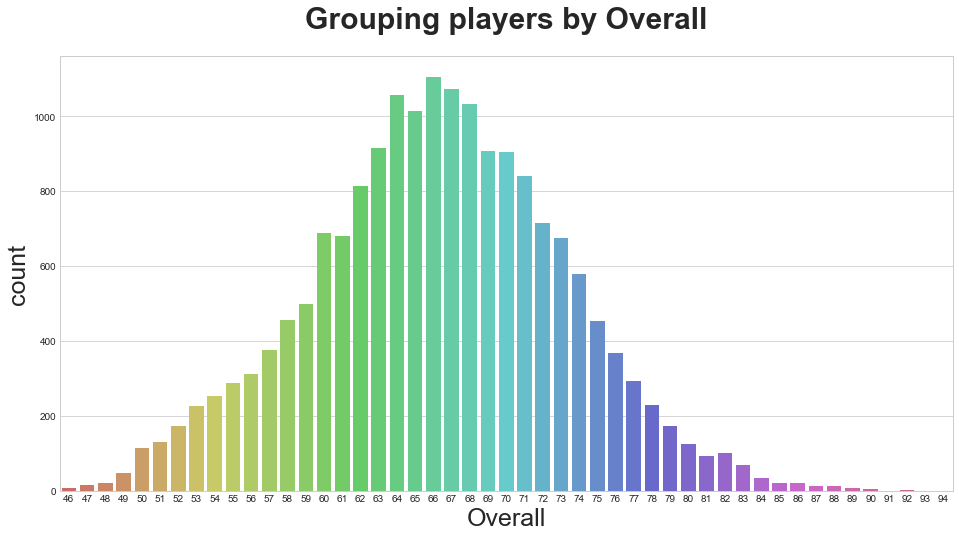

In [9]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

### 2.3 Preferred Position

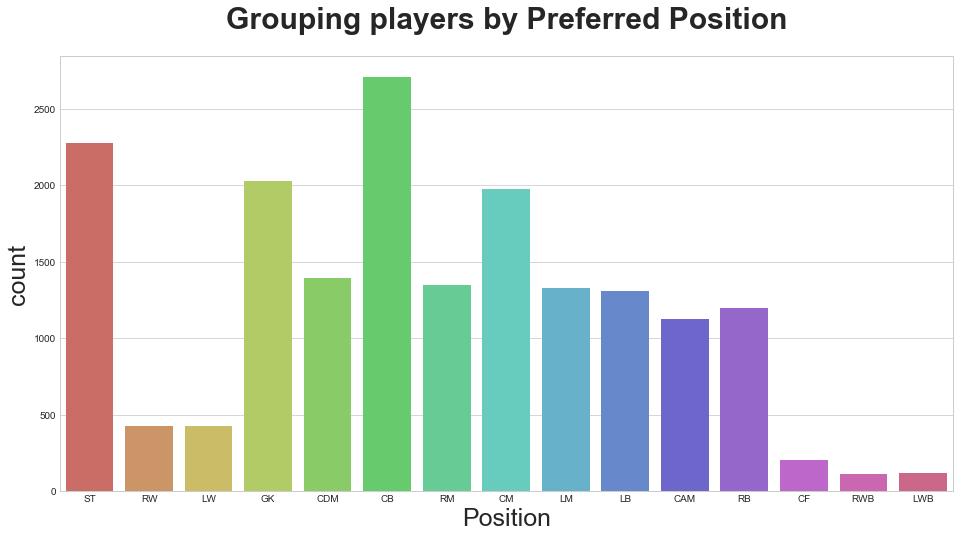

In [10]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA18, palette="hls");
plt.show()

### 2.4 Nationality

In [ ]:
# Grouping the data by countries
valcon = FIFA18.groupby("Nationality").size().reset_index(name="Count")

# Plotting the choropleth map
init_notebook_mode()
plotmap = [ dict(
        type = 'choropleth',
        locations = valcon["Nationality"],
        locationmode = 'country names',
        z = valcon["Count"],
        text = valcon["Nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Amount of Players"),
      ) ]

layout = dict(
    title = "Nationalities of FIFA 18 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=plotmap, layout=layout)
iplot(fig)

In case the plot.ly image doesn't show:

![nationalities](images/Nationalities.png)

In [ ]:
FIFA18["Nationality"].value_counts().head(25)

I can see that the players are very centralized in Europe. To be precise, England, Germany, Spain, and France.

### 2.5 Value
Let's see the 20 players with highest value:

In [ ]:
sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].values

In [ ]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Let's make a scatter chart of the players' Value with respect to their Age and Overall:

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 2.6 Wage
Let's see the 20 players with highest wage:

In [ ]:
sorted_players = FIFA18.sort_values(["WageNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].values

In [ ]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Let's make a scatter chart of the players' Wage with respect to their Age and Overall:

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

## 3 - Best Squad Analysis
For simplicity of this analysis, I only pull in data I am interested in:

In [ ]:
FIFA18 = FIFA18[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA18.head(10)

### 3.1 Squad of Highest Overall Players
What's the best squad according to FIFA 18 purely based on overall rating?

In [ ]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [ ]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

In [ ]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

In [ ]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

Alright, now let's move onto studying different squad's impact on Nationality teams. First let's modifiy above get_summary and get_best_squad functions for Nationality:

In [ ]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [ ]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

Also let's make our squad choices more strict:

In [ ]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [ ]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

### 3.2 France
Let's explore different squad possibility of France and how it affects the ratings:

In [ ]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

So we can say that France has the best squard as 4-3-3 for the current squad; and 4-4-2, 4-3-3, and 4-2-3-1 for the future squad based on team ratings. Let's check out the best 11 squad line-up of France in 4-3-3 for current rating as well as 4-4-2 for potential rating:

In [ ]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

In [ ]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

![griezmann](images/griezmann.jpeg)

### 3.3 Germany
The holding champion is certainly a heavy candidate for this year's 1st place:

In [ ]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

As you can see, Germany's current ratings peak with either 3-4-3 or 4-3-3 formation; while those 2 plus 4-2-3-1 are their best options for the future. With that, I'll show Germany's best 11 squad with 4-3-3 for current ratings and 4-2-3-1 for potential ratings.

In [ ]:
rating_433_GER_Overall, best_list_433_GER_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_GER_Overall))
print(best_list_433_GER_Overall)

In [ ]:
rating_4231_GER_Potential, best_list_4231_GER_Potential = get_best_squad_n(squad_4231_strict, 'Germany', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_GER_Potential))
print(best_list_4231_GER_Potential)

![kroos](images/kroos.jpeg)

### 3.4 Spain
How about our 2010's winner?

In [ ]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

Well, Spain does best with either 4-3-3 or 4-2-3-1 for both current and potential rating. I'll choose 4-2-3-1 for the current squad and 4-3-3 for the potential squad.

In [ ]:
rating_4231_ESP_Overall, best_list_4231_ESP_Overall = get_best_squad_n(squad_4231_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_ESP_Overall))
print(best_list_4231_ESP_Overall)

In [ ]:
rating_433_ESP_Potential, best_list_433_ESP_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ESP_Potential))
print(best_list_433_ESP_Potential)

![ramos](images/ramos.jpg)

### 3.5 England
Although having the best soccer league in Europe, England did not seem to do that well at the national level. Let's figure out their options for the upcoming World Cup:

In [ ]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

England should stick to 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad. Thus, I'll choose 4-3-3 and 4-2-3-1 respectively.

In [ ]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

In [ ]:
rating_4231_ENG_Potential, best_list_4231_ENG_Potential = get_best_squad_n(squad_4231_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_ENG_Potential))
print(best_list_4231_ENG_Potential)

![kane](images/kane.jpg)

### 3.6 Brazil
Having won the World Cup the most times in history, the Samba team will no doubt be one of the top candidates for this summer in Russia.

In [ ]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = True)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)

print (Brazil)

As you can see, Brazil has similar options like England. I'll go with 4-3-3 for the current rating and 4-2-3-1 for the potential rating.

In [ ]:
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

In [ ]:
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

![neymar](images/neymar.jpg)

### 3.7 Argentina
Lionel Messi is still waiting for the only trophy he hasn't gotten yet in his career. Can he carry Argentina to the top after going short in the final 4 years ago?

In [ ]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Argentina.set_index('Nationality', inplace = True)
Argentina[['Overall', 'Potential']] = Argentina[['Overall', 'Potential']].astype(float)

print (Argentina)

Both 3-4-3 and 4-3-3 fare very well for the current and potential ratings of Argentine players. For the sake of diversity, I'll choose 3-4-3 for their current squad and 4-3-3 for their future squad.

In [ ]:
rating_343_ARG_Overall, best_list_343_ARG_Overall = get_best_squad_n(squad_343_strict, 'Argentina', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_ARG_Overall))
print(best_list_343_ARG_Overall)

In [ ]:
rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

![messi](images/messi.jpg)

### 3.8 Belgium
The Red Devils has some of the best players in English Premier League, but can't never seem to make it far in the national level. Can Hazard and De Bruyne drive them far this time?

In [ ]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Overall', 'Potential']] = Belgium[['Overall', 'Potential']].astype(float)

print (Belgium)

Again, 4-3-3 is the best formation for Belgium's both current and future squad.

In [ ]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

In [ ]:
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

![de-bruyne](images/de-bruyne.jpg)

### 3.9 - Portugal
The winner of Euro 2016 and the best player in the world 3 times in a row, Cristiano Ronaldo, has a real chance in this tournament as well.

In [ ]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Portugal.set_index('Nationality', inplace = True)
Portugal[['Overall', 'Potential']] = Portugal[['Overall', 'Potential']].astype(float)

print (Portugal)

OK, I'll go with 4-2-3-1 for current rating and 4-3-3 for potential rating of Portugal.

In [ ]:
rating_4231_POR_Overall, best_list_4231_POR_Overall = get_best_squad_n(squad_4231_strict, 'Portugal', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_POR_Overall))
print(best_list_4231_POR_Overall)

In [ ]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

![ronaldo](images/ronaldo.jpg)

### 3.10 - Uruguay
Uruguay has the 2 best strikers in Europe: Suarez & Cavani. Can they perform this time?

In [ ]:
Uruguay = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Uruguay'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Uruguay.set_index('Nationality', inplace = True)
Uruguay[['Overall', 'Potential']] = Uruguay[['Overall', 'Potential']].astype(float)

print (Uruguay)

Fantastic, Uruguay does best with a 4-3-1-2 for current rating and 4-4-2 for future rating.

In [ ]:
rating_4312_URG_Overall, best_list_4312_URG_Overall = get_best_squad_n(squad_4312_strict, 'Uruguay', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_URG_Overall))
print(best_list_4312_URG_Overall)

In [ ]:
rating_442_URG_Potential, best_list_442_URG_Potential = get_best_squad_n(squad_442_strict, 'Uruguay', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_URG_Potential))
print(best_list_442_URG_Potential)

![](images/cavani.jpg)

### 3.11 - Croatia
Well, I'm a big fan of Modric and Rakitic. Needless to say about their winning habits?

In [ ]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Croatia.set_index('Nationality', inplace = True)
Croatia[['Overall', 'Potential']] = Croatia[['Overall', 'Potential']].astype(float)

print (Croatia)

Dope, Croatia is superior with a 4-2-3-1 using current form and 4-3-3 using potential form.

In [ ]:
rating_4231_CRO_Overall, best_list_4231_CRO_Overall = get_best_squad_n(squad_4231_strict, 'Croatia', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_CRO_Overall))
print(best_list_4231_CRO_Overall)

In [ ]:
rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Croatia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

![](images/modric.jpg)

## 4 - Final Comparison
Ok, let's make some comparison between these 10 line-ups with the current rating of players for these strongest contenders for World Cup 2018.

In [ ]:
teams = ('France', 'Germany', 'Spain', 'England', 'Brazil', 'Argentina', 'Belgium', 'Portugal', 'Uruguay', 'Croatia')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 85.5, 84.3, 84.3, 83.5, 81.1, 81.6]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [ ]:
total_value = [446.5, 502, 484.5, 298.5, 433, 382, 440.5, 323, 283.5, 244.9]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [ ]:
average_wage = [141, 188, 228, 119, 167, 151, 166, 118, 99, 110]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

## Conclusion
So based purely on the FIFA 18 Data:
* Spain has the highest average overall rating, followed by Germany and Brazil. 
* Germany has the highest total value, followed by Spain and France. 
* Spain has the highest average wage, followed by Germany and Brazil.

My bet is for a **Spain vs Germany** in the final, and **Brazil vs France** for the 3rd place. Your turn?